In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
df = pd.read_csv('train.csv')
data = pd.read_csv('test.csv')

In [2]:
X = df.drop('label', axis = 1).values
y = df['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [176]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
earlyS = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience = 25)

model.add(Dense(784, activation = 'tanh'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [4]:
model.fit(x=X_train, y=y_train, validation_data = (X_test, y_test), batch_size = 128, epochs=400, callbacks=[earlyS])

Epoch 1/400
230/230 [==============================] - 7s 28ms/step - loss: 2.7747 - val_loss: 2.1213
Epoch 2/400
230/230 [==============================] - 7s 30ms/step - loss: 1.6444 - val_loss: 2.0158
Epoch 3/400
230/230 [==============================] - 6s 25ms/step - loss: 1.4780 - val_loss: 1.2615
Epoch 4/400
230/230 [==============================] - 5s 24ms/step - loss: 1.3495 - val_loss: 1.3203
Epoch 5/400
230/230 [==============================] - 5s 23ms/step - loss: 1.2922 - val_loss: 1.4144
Epoch 6/400
230/230 [==============================] - 5s 23ms/step - loss: 1.2850 - val_loss: 1.3128
Epoch 7/400
230/230 [==============================] - 6s 24ms/step - loss: 1.3086 - val_loss: 1.3043
Epoch 8/400
230/230 [==============================] - 5s 23ms/step - loss: 1.2205 - val_loss: 1.1800
Epoch 9/400
230/230 [==============================] - 5s 23ms/step - loss: 1.1738 - val_loss: 1.0592
Epoch 10/400
230/230 [==============================] - 6s 27ms/step - loss: 1.119

230/230 [==============================] - 6s 25ms/step - loss: 0.6022 - val_loss: 0.6696
Epoch 81/400
230/230 [==============================] - 6s 26ms/step - loss: 0.6393 - val_loss: 0.7556
Epoch 82/400
230/230 [==============================] - 6s 25ms/step - loss: 0.6170 - val_loss: 0.7290
Epoch 83/400
230/230 [==============================] - 6s 24ms/step - loss: 0.6016 - val_loss: 0.7260
Epoch 84/400
230/230 [==============================] - 6s 25ms/step - loss: 0.6160 - val_loss: 0.6869
Epoch 85/400
230/230 [==============================] - 6s 25ms/step - loss: 0.6096 - val_loss: 0.7428
Epoch 86/400
230/230 [==============================] - 6s 25ms/step - loss: 0.6211 - val_loss: 0.6567
Epoch 87/400
230/230 [==============================] - 6s 26ms/step - loss: 0.6094 - val_loss: 0.6578
Epoch 88/400
230/230 [==============================] - 6s 25ms/step - loss: 0.6202 - val_loss: 0.6708
Epoch 89/400
230/230 [==============================] - 6s 25ms/step - loss: 0.6286 - 

230/230 [==============================] - 6s 26ms/step - loss: 0.5038 - val_loss: 0.6577
Epoch 160/400
230/230 [==============================] - 6s 27ms/step - loss: 0.4820 - val_loss: 0.6228
Epoch 161/400
230/230 [==============================] - 7s 32ms/step - loss: 0.5052 - val_loss: 0.6363
Epoch 162/400
230/230 [==============================] - 6s 25ms/step - loss: 0.4776 - val_loss: 0.6106
Epoch 163/400
230/230 [==============================] - 6s 25ms/step - loss: 0.4857 - val_loss: 0.5556
Epoch 164/400
230/230 [==============================] - 7s 29ms/step - loss: 0.4855 - val_loss: 0.5901
Epoch 165/400
230/230 [==============================] - 6s 25ms/step - loss: 0.4770 - val_loss: 0.6144
Epoch 166/400
230/230 [==============================] - 8s 34ms/step - loss: 0.4826 - val_loss: 0.6110
Epoch 167/400
230/230 [==============================] - 7s 31ms/step - loss: 0.4813 - val_loss: 0.5920
Epoch 168/400
230/230 [==============================] - 7s 30ms/step - loss: 

<AxesSubplot:>

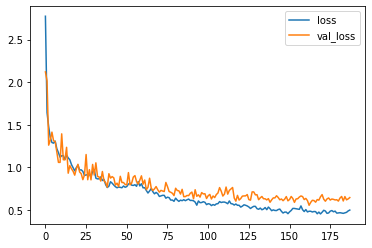

In [5]:
pd.DataFrame(model.history.history).plot()

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
prediction = model.predict(X_test)
rounded = [np.round(x) for x in prediction]
print(mean_squared_error(y_test, prediction)**0.5)
print(mean_absolute_error(y_test, prediction))
print(explained_variance_score(y_test, prediction))

394/394 [==============================] - 2s 5ms/step
0.8037599892185983
0.3863878037839655
0.9241487818644047


In [16]:
def test_prediction(index, prediction, y_test, X_train):
    current_image = X_train[index,:]
    pred = prediction[index]
    label = y_test[index]
    print("Prediction: ", pred)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28))
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5.]
Label:  5


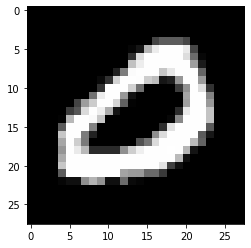

In [17]:
test_prediction(7,rounded, y_test, X_train)